In [1]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print('train images        :', mnist.train.images.shape,
      'labels:'              , mnist.train.labels.shape)
print('validation images   :', mnist.validation.images.shape,
      ' labels:'              , mnist.validation.labels.shape)
print('test images         :', mnist.test.images.shape,
      'labels:'              , mnist.test.labels.shape)

train images        : (55000, 784) labels: (55000, 10)
validation images   : (5000, 784)  labels: (5000, 10)
test images         : (10000, 784) labels: (10000, 10)


In [3]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs,W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [4]:
X = tf.placeholder('float', [None,784])

In [5]:
h1 = layer(output_dim=1000, input_dim=784, inputs=X, activation=tf.nn.relu)

In [6]:
h2 = layer(output_dim=1000, input_dim=1000, inputs=h1, activation=tf.nn.relu)

In [7]:
y_predict = layer(output_dim=10, input_dim=1000, inputs=h2, activation=None)

In [8]:
y_label = tf.placeholder('float', [None,10])

In [9]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2
                               (logits=y_predict, labels=y_label))

In [10]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [11]:
correct_prediction = tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict, 1))

In [12]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [13]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples / batchSize)
loss_list = []; epoch_list=[];accuracy_list=[]
from time import time
startTime = time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={X: batch_x, y_label:batch_y})
    loss, acc = sess.run([loss_function, accuracy], feed_dict={X: mnist.validation.images,
                                                               y_label: mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch:', '%02d' % (epoch+1), 'Loss=', '{:.9f}'.format(loss), 'Accuracy', acc)

duration = time()-startTime
print('Train Finished takes:', duration)

Train Epoch: 01 Loss= 135.573577881 Accuracy 0.9164
Train Epoch: 02 Loss= 90.419227600 Accuracy 0.9372
Train Epoch: 03 Loss= 89.098953247 Accuracy 0.9358
Train Epoch: 04 Loss= 64.967094421 Accuracy 0.9494
Train Epoch: 05 Loss= 59.143325806 Accuracy 0.9528
Train Epoch: 06 Loss= 58.060970306 Accuracy 0.9586
Train Epoch: 07 Loss= 55.795345306 Accuracy 0.9548
Train Epoch: 08 Loss= 50.449607849 Accuracy 0.9618
Train Epoch: 09 Loss= 61.378799438 Accuracy 0.9566
Train Epoch: 10 Loss= 47.954170227 Accuracy 0.9642
Train Epoch: 11 Loss= 48.317443848 Accuracy 0.9662
Train Epoch: 12 Loss= 46.726554871 Accuracy 0.9662
Train Epoch: 13 Loss= 44.646198273 Accuracy 0.9686
Train Epoch: 14 Loss= 49.385761261 Accuracy 0.9666
Train Epoch: 15 Loss= 49.295665741 Accuracy 0.9688
Train Finished takes: 26.635846376419067


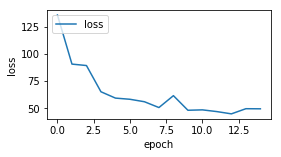

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

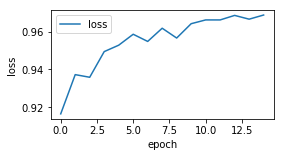

In [16]:
fig = plt.gcf()
fig.set_size_inches(4, 2)
plt.plot(epoch_list, accuracy_list, label='accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

In [17]:
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, y_label: mnist.test.labels}))

Accuracy: 0.966


In [18]:
prediction_result = sess.run(tf.argmax(y_predict,1), feed_dict={X:mnist.test.images})

In [19]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [20]:
import numpy as np
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(np.reshape(images[idx],(28,28),), cmap='binary')
        title = 'label=' + str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+= ',predict=' + str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([])#hide the ticks
        ax.set_yticks([])
        idx+=1
    plt.show()

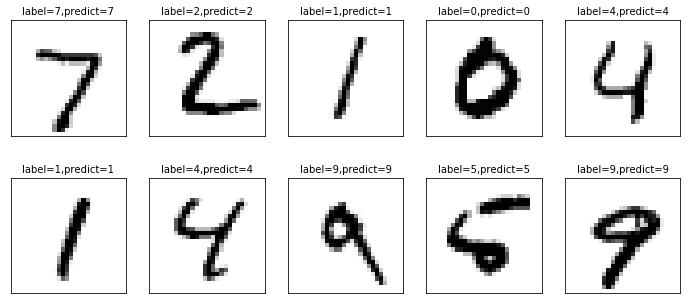

In [21]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)